# 데이터 분석
> 1. 각 컬럼별 관중 수 관계 파악하기
> 2. 상관계수 확인하기

In [35]:
# 계산
import pandas as pd
import numpy as np
import holidays

# 차트
import seaborn as sns
import matplotlib.pyplot as plt

# 표준화
from sklearn.preprocessing import StandardScaler

# 분류 예측 함수
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# 모델
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# 차트 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 한글 폰트 문제 해결 함수
def fontKorea():
    # 한글 폰트 문제 해결 
    # matplotlib은 한글 폰트를 지원하지 않음
    # os정보
    import platform

    # font_manager : 폰트 관리 모듈
    # rc : 폰트 변경 모듈
    from matplotlib import font_manager, rc
    # unicode 설정
    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic') # os가 macos
    elif platform.system() == 'Windows':
        path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print("Unknown System")

In [4]:
# 데이터 열기
kiwoom_new = pd.read_csv('../Data/kiwoom_new.csv')
kiwoom_new.head()

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,키움,6,1,0,1,0,0.000,1.0,0승0무1패,...,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,키움,4,2,1,1,0,0.500,1.0,1승0무1패,...,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,키움,6,3,1,2,0,0.333,2.0,1승0무2패,...,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,키움,7,4,1,3,0,0.250,3.0,1승0무3패,...,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,키움,7,5,1,4,0,0.200,4.0,1승0무4패,...,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척


In [5]:
kiwoom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          171 non-null    object 
 1   팀명          171 non-null    object 
 2   순위          171 non-null    int64  
 3   총 경기수       171 non-null    int64  
 4   승리          171 non-null    int64  
 5   패배          171 non-null    int64  
 6   무승부         171 non-null    int64  
 7   승률          171 non-null    float64
 8   게임차         171 non-null    float64
 9   최근 10경기 전적  171 non-null    object 
 10  연속 승패 현황    171 non-null    object 
 11  홈 경기 전적     171 non-null    object 
 12  원정 경기 전적    171 non-null    object 
 13  요일          171 non-null    object 
 14  홈팀          171 non-null    object 
 15  원정팀         171 non-null    object 
 16  장소          171 non-null    object 
 17  관중 수        171 non-null    int64  
 18  시작시간        171 non-null    object 
 19  종료시간        171 non-null    o

----
## 필요 데이터 선별
----

In [6]:
# 날짜 데이터 타입 변환
kiwoom_new['날짜'] = kiwoom_new['날짜'].astype('datetime64[ns]')
kiwoom_new

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,키움,6,1,0,1,0,0.000,1.0,0승0무1패,...,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,키움,4,2,1,1,0,0.500,1.0,1승0무1패,...,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,키움,6,3,1,2,0,0.333,2.0,1승0무2패,...,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,키움,7,4,1,3,0,0.250,3.0,1승0무3패,...,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,키움,7,5,1,4,0,0.200,4.0,1승0무4패,...,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2024-05-19,키움,7,45,19,26,0,0.422,10.0,4승0무6패,...,키움,SSG,고척,10049,14:01,17:13,3:12,김인범,오원석,고척
167,2024-05-21,키움,8,46,19,27,0,0.413,10.0,4승0무6패,...,키움,NC,고척,3940,18:31,21:53,3:22,하영민,신민혁,고척
168,2024-05-22,키움,8,47,19,28,0,0.404,10.0,4승0무6패,...,키움,NC,고척,4337,18:31,21:54,3:23,후라도,하트,고척
169,2024-05-23,키움,8,48,20,28,0,0.417,9.0,5승0무5패,...,키움,NC,고척,3897,18:30,21:14,2:44,헤이수스,김시훈,고척


In [7]:
# 정보 확인
kiwoom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          171 non-null    datetime64[ns]
 1   팀명          171 non-null    object        
 2   순위          171 non-null    int64         
 3   총 경기수       171 non-null    int64         
 4   승리          171 non-null    int64         
 5   패배          171 non-null    int64         
 6   무승부         171 non-null    int64         
 7   승률          171 non-null    float64       
 8   게임차         171 non-null    float64       
 9   최근 10경기 전적  171 non-null    object        
 10  연속 승패 현황    171 non-null    object        
 11  홈 경기 전적     171 non-null    object        
 12  원정 경기 전적    171 non-null    object        
 13  요일          171 non-null    object        
 14  홈팀          171 non-null    object        
 15  원정팀         171 non-null    object        
 16  장소          171 non-null  

In [8]:
# 해당 열들은 하는 분석 내용과 상관이 없는 데이터 -> 삭제
# kiwoom_new = kiwoom_new.drop(['팀명','홈팀','장소','구장','홈팀 선발','어웨이팀 선발',],axis=1)
kiwoom_new = kiwoom_new[['날짜','순위','요일','원정팀','관중 수']]
kiwoom_new

,날짜,순위,요일,원정팀,관중 수
0,2022-04-02,6,토,롯데,8257
1,2022-04-03,4,일,롯데,6115
2,2022-04-05,6,화,LG,2298
3,2022-04-06,7,수,LG,2304
4,2022-04-07,7,목,LG,2055
...,...,...,...,...,...
166,2024-05-19,7,일,SSG,10049
167,2024-05-21,8,화,NC,3940
168,2024-05-22,8,수,NC,4337
169,2024-05-23,8,목,NC,3897


In [9]:
# 2022년부터 2024년까지 한국 공휴일 가져오기
kr_holidays = holidays.KR(years=[2022, 2023, 2024])

# 주말을 '빨간날'로 설정
kiwoom_new['휴일유무'] = kiwoom_new['날짜'].dt.dayofweek.apply(lambda x: '휴일' if x >= 5 else '평일')

# 공휴일을 '빨간날'로 설정
kiwoom_new['휴일유무'] = kiwoom_new['날짜'].apply(lambda x: '휴일' if x in kr_holidays else kiwoom_new.loc[kiwoom_new['날짜'] == x, '휴일유무'].values[0])

In [10]:
kiwoom_new

,날짜,순위,요일,원정팀,관중 수,휴일유무
0,2022-04-02,6,토,롯데,8257,휴일
1,2022-04-03,4,일,롯데,6115,휴일
2,2022-04-05,6,화,LG,2298,평일
3,2022-04-06,7,수,LG,2304,평일
4,2022-04-07,7,목,LG,2055,평일
...,...,...,...,...,...,...
166,2024-05-19,7,일,SSG,10049,휴일
167,2024-05-21,8,화,NC,3940,평일
168,2024-05-22,8,수,NC,4337,평일
169,2024-05-23,8,목,NC,3897,평일


----
## 2022~2023년 데이터와 2024년 데이터 분리
----

In [11]:
# 2022 ~ 2023년도 데이터
kiwoom_2022_2023 = \
    kiwoom_new[
        (kiwoom_new.날짜.dt.year == 2022) | 
        (kiwoom_new.날짜.dt.year == 2023)
        ]
kiwoom_2022_2023

,날짜,순위,요일,원정팀,관중 수,휴일유무
0,2022-04-02,6,토,롯데,8257,휴일
1,2022-04-03,4,일,롯데,6115,휴일
2,2022-04-05,6,화,LG,2298,평일
3,2022-04-06,7,수,LG,2304,평일
4,2022-04-07,7,목,LG,2055,평일
...,...,...,...,...,...,...
138,2023-09-21,10,목,NC,5178,평일
139,2023-09-28,10,목,SSG,7082,휴일
140,2023-09-29,10,금,KIA,14472,휴일
141,2023-10-07,10,토,LG,13301,휴일


In [12]:
# 2024년도 데이터
kiwoom_2024 = \
    kiwoom_new[
        (kiwoom_new.날짜.dt.year == 2024)
        ].reset_index(drop=True)
kiwoom_2024

,날짜,순위,요일,원정팀,관중 수,휴일유무
0,2024-03-29,10,금,LG,8465,평일
1,2024-03-30,8,토,LG,13462,휴일
2,2024-03-31,7,일,LG,11822,휴일
3,2024-04-05,5,금,한화,16000,평일
4,2024-04-06,5,토,한화,16000,휴일
5,2024-04-07,3,일,한화,16000,휴일
6,2024-04-12,3,금,롯데,8838,평일
7,2024-04-13,3,토,롯데,14197,휴일
8,2024-04-14,3,일,롯데,12333,휴일
9,2024-04-16,2,화,KT,2877,평일


----
## 컬럼별 타겟 분석 시작
----

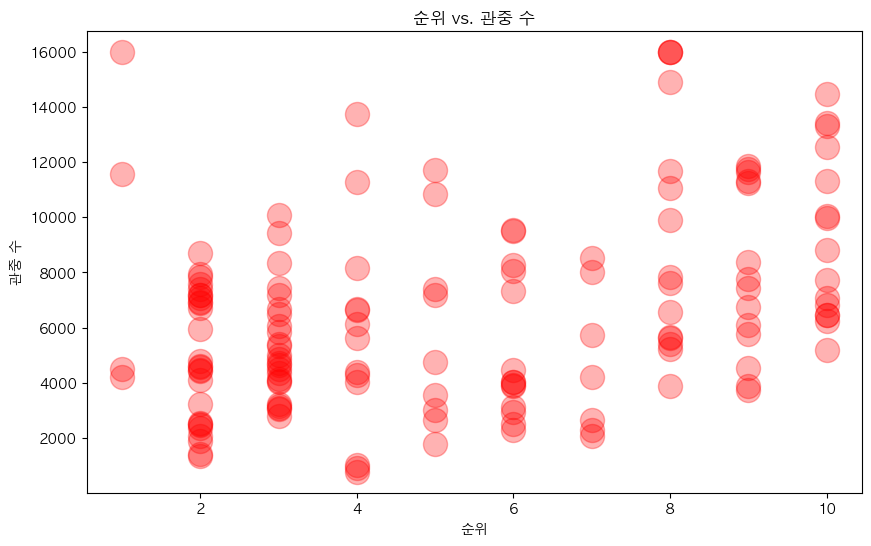

In [13]:
fontKorea()

# 월과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    kiwoom_2022_2023['순위'], 
    kiwoom_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('순위 vs. 관중 수')
plt.xlabel('순위')
plt.ylabel('관중 수')
plt.show()

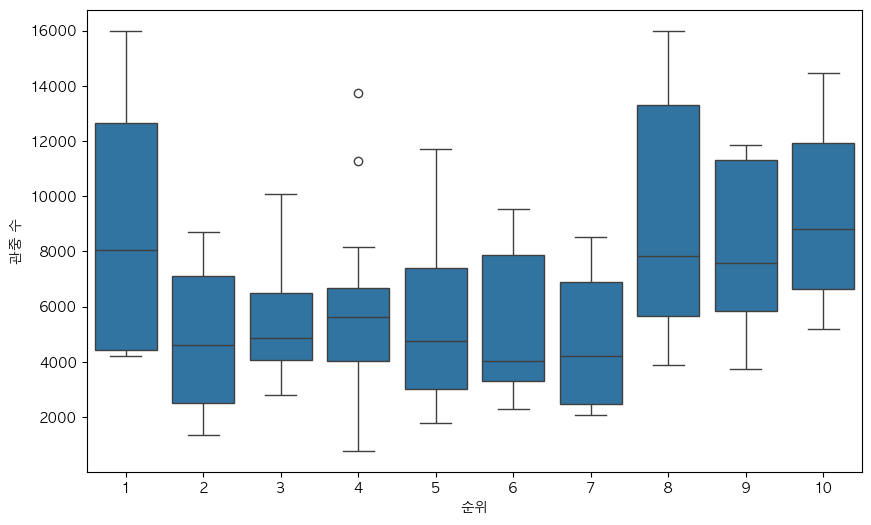

In [14]:
fontKorea()

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='순위', y='관중 수', data=kiwoom_2022_2023)
plt.title('')
plt.show()

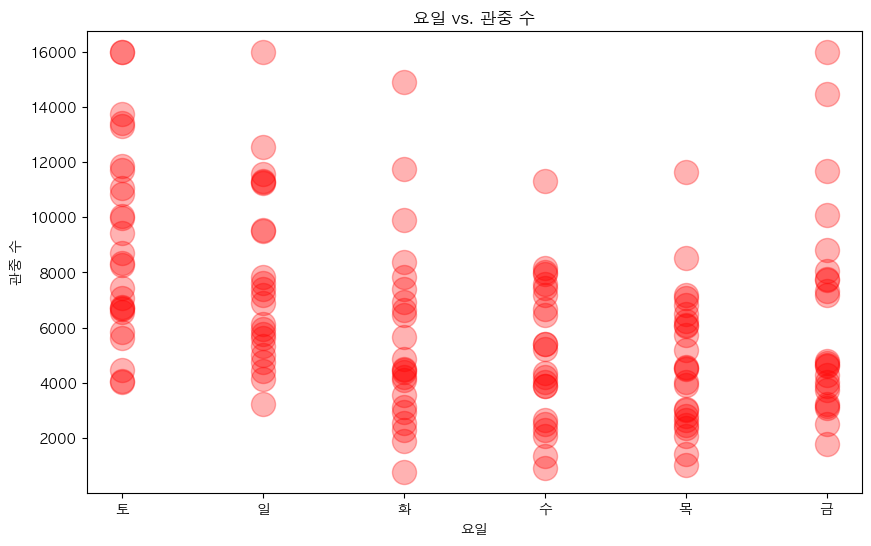

In [15]:
fontKorea()

# 월과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    kiwoom_2022_2023['요일'], 
    kiwoom_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('요일 vs. 관중 수')
plt.xlabel('요일')
plt.ylabel('관중 수')
plt.show()

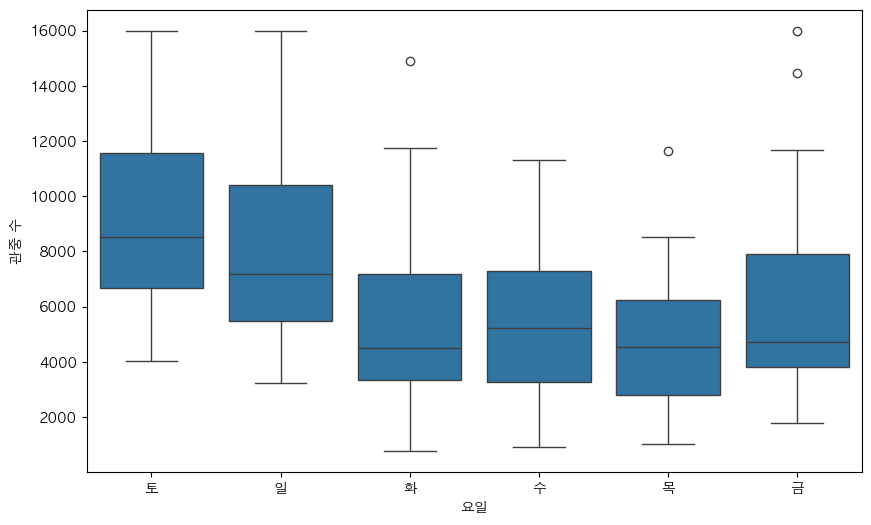

In [16]:
fontKorea()

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='요일', y='관중 수', data=kiwoom_2022_2023)
plt.title('')
plt.show()

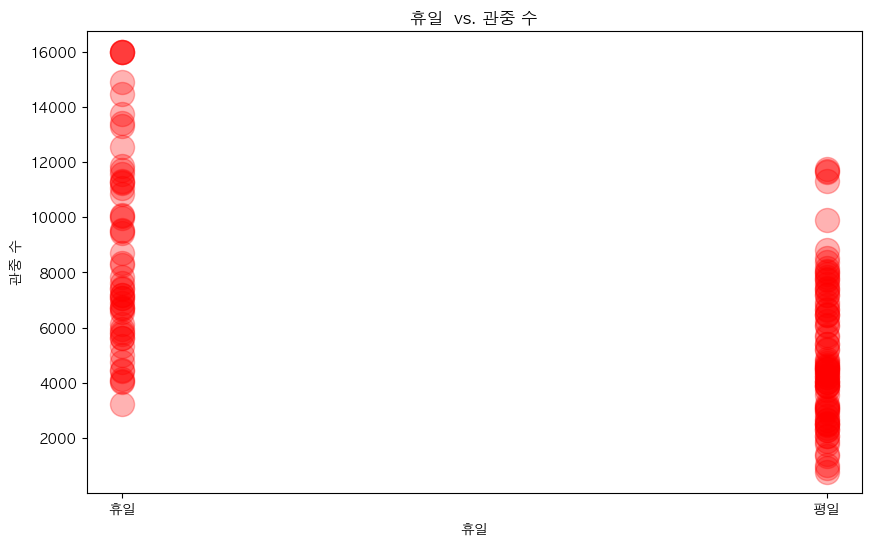

In [17]:
fontKorea()

# 휴일과 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    kiwoom_2022_2023['휴일유무'], 
    kiwoom_2022_2023['관중 수'], 
    color='red',
    s=300,
    alpha=0.3
    )

plt.title('휴일  vs. 관중 수')
plt.xlabel('휴일')
plt.ylabel('관중 수')
plt.show()

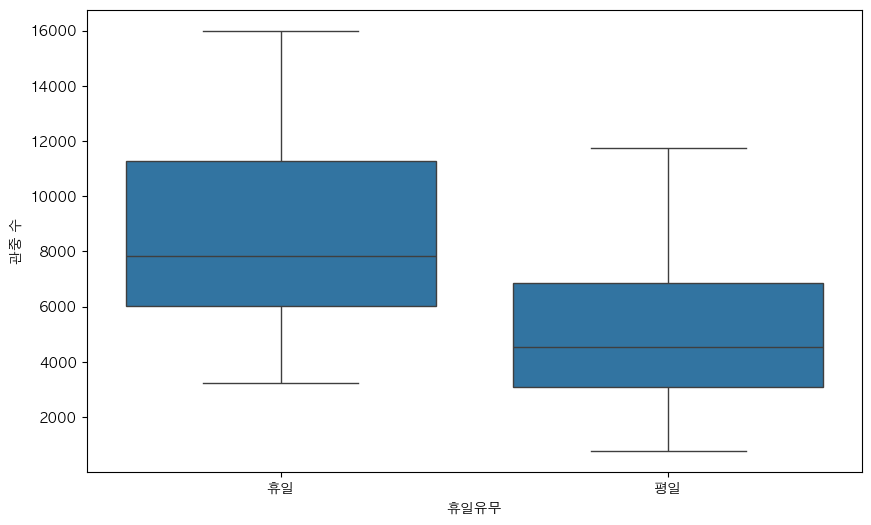

In [18]:
fontKorea()

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='휴일유무', y='관중 수', data=kiwoom_2022_2023)
plt.title('')
plt.show()

In [19]:
# 요일을 숫자로 매핑
day_mapping = {
    '휴일': 1,
    '평일': 0
}

# '요일수치화' 컬럼 추가
kiwoom_2022_2023['휴일유무수치화'] = kiwoom_2022_2023['휴일유무'].map(day_mapping)
kiwoom_2024['휴일유무수치화'] = kiwoom_2024['휴일유무'].map(day_mapping)


In [21]:
# 순위을 숫자로 매핑
mapping = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 1,
    5 : 1,
    6 : 1,
    7 : 2,
    8 : 2,
    9 : 2,
    10 : 2
}

# '상중하위권수치화'컬럼 추가
kiwoom_2022_2023['상중하위권수치화'] = kiwoom_2022_2023['순위'].map(mapping)
kiwoom_2024['상중하위권수치화'] = kiwoom_2024['순위'].map(mapping)

In [22]:
kiwoom_2022_2023[['관중 수','휴일유무수치화','상중하위권수치화']].corr()

,관중 수,휴일유무수치화,상중하위권수치화
관중 수,1.000000,0.529363,0.363398
휴일유무수치화,0.529363,1.000000,-0.017910
상중하위권수치화,0.363398,-0.017910,1.000000


In [23]:
# 요일을 숫자로 매핑
mapping = {
    '화': 0,
    '수': 0,
    '목': 0,
    '금': 1,
    '토': 1,
    '일': 1,

}

# '요일수치화' 컬럼 추가
kiwoom_2022_2023['화목_금일수치화'] = kiwoom_2022_2023['요일'].map(mapping)
kiwoom_2024['화목_금일수치화'] = kiwoom_2024['요일'].map(mapping)


In [26]:
kiwoom_2022_2023[['관중 수','휴일유무수치화','상중하위권수치화','화목_금일수치화']].corr()

,관중 수,휴일유무수치화,상중하위권수치화,화목_금일수치화
관중 수,1.000000,0.529363,0.363398,0.382295
휴일유무수치화,0.529363,1.000000,-0.017910,0.698814
상중하위권수치화,0.363398,-0.017910,1.000000,-0.072537
화목_금일수치화,0.382295,0.698814,-0.072537,1.000000


----
# k 값 찾기
----

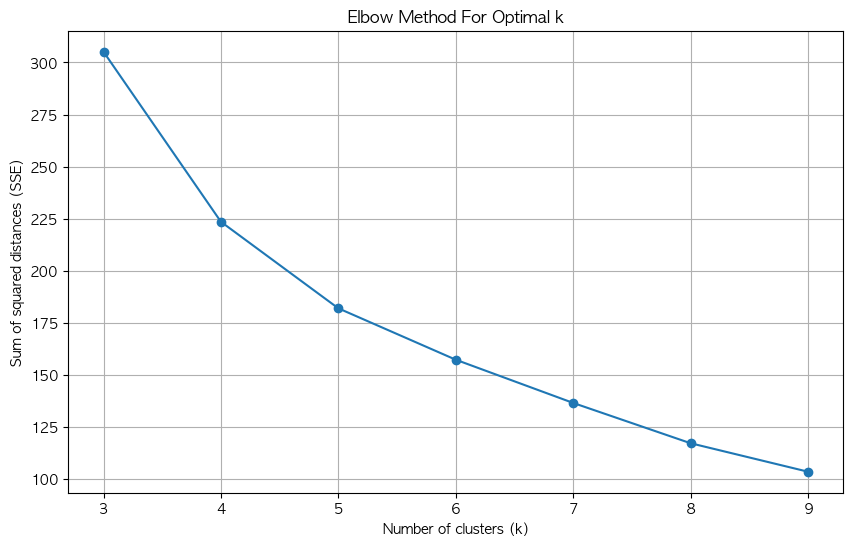

In [28]:
# 데이터 전처리
features = kiwoom_2022_2023[['관중 수','휴일유무수치화','상중하위권수치화','화목_금일수치화']]
target = kiwoom_2022_2023['관중 수']

# 관중 수 데이터를 reshape하여 2차원 배열로 전환
attendance_shape = np.array(target).reshape(-1, 1)

# features와 target과 결합 데이터
final_data = np.hstack((features, attendance_shape))

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_data)

# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
sse = []
k_range = range(3, 10)  # 3부터 15까지의 k 값에 대해 확인

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [29]:
# K-means 클러스터링
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(attendance_shape)
clusters

# 각 클러스터의 관중 수 범위 계산
cluster_ranges = {}

for cluster in range(4):
    cluster_data = \
        kiwoom_2022_2023[clusters == cluster]
    min_attendance = \
        cluster_data['관중 수'].min()
    max_attendance = \
        cluster_data['관중 수'].max()
    cluster_ranges[cluster] = (min_attendance, max_attendance)
cluster_ranges

{0: (5178, 8817), 1: (13301, 16000), 2: (774, 5009), 3: (9442, 12545)}

In [30]:
sorted(cluster_ranges.items(), key=lambda item: item[1][0])

[(2, (774, 5009)), (0, (5178, 8817)), (3, (9442, 12545)), (1, (13301, 16000))]

In [31]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2022_2023['관중수분류'] = \
    pd.cut(kiwoom_2022_2023['관중 수'], 
    bins=[0,5100,9000,13000,float('inf')], 
    labels=[
            '5000명 미만',
            '5000 ~ 9000명',
            '9000명 ~ 13000명',
            '13000명 이상'

        ], 
    right=False)

In [32]:
# 규칙에 따라 관중 수를 분류하여 새로운 컬럼에 할당
kiwoom_2024['관중수분류'] = \
    pd.cut(kiwoom_2024['관중 수'], 
    bins=[0,5100,9000,13000,float('inf')], 
    labels=[
            '5000명 미만',
            '5000 ~ 9000명',
            '9000명 ~ 13000명',
            '13000명 이상'

        ], 
    right=False)

----
# 예측
----

In [34]:
# 훈련 데이터와 테스트 데이터 나눔
x = kiwoom_2022_2023[['휴일유무수치화','상중하위권수치화','화목_금일수치화']]
y = kiwoom_2022_2023['관중수분류']
test_x = kiwoom_2024[['휴일유무수치화','상중하위권수치화','화목_금일수치화']]
test_y = kiwoom_2024['관중수분류']

In [36]:
# 랜덤포레스트를 이용한 교차검증 10번 실시
cv_scores = []
for i in range(10):
    scores = cross_val_score(
        RandomForestClassifier(),
        x,
        y,
        cv=10,
        scoring='accuracy'
    )
    cv_scores.append(round(scores.mean(),4)*100)
cv_scores

[54.0,
 54.669999999999995,
 53.949999999999996,
 51.85999999999999,
 55.379999999999995,
 54.0,
 52.52,
 53.949999999999996,
 53.239999999999995,
 54.0]

In [37]:
# 데이터 학습 시키고 예측하기
clf = RandomForestClassifier()
clf.fit(x,y)
clf.score(test_x, test_y)
pre = clf.predict(test_x)

# 정답률 구하기
# np.mean(pre == test_label)

ac_score = accuracy_score(test_y, pre)

print('정답률 =', ac_score)

정답률 = 0.39285714285714285


In [38]:
# 데이터 학습 시키고 예측하기
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x,y)
clf.score(test_x, test_y)
pre = clf.predict(test_x)

# 정답률 구하기
ac_score = accuracy_score(test_y, pre)

print('정답률 =', ac_score)

정답률 = 0.39285714285714285


In [39]:
# 데이터 학습 시키고 예측하기
svm = SVC()
svm.fit(x,y)
svm.score(test_x, test_y)
pre = svm.predict(test_x)

# 정답률 구하기
ac_score = accuracy_score(test_y, pre)

print('정답률 =', ac_score)

정답률 = 0.39285714285714285


In [48]:
thiss = np.array([
    [1,1,0]
])

In [49]:
svm.predict(thiss)

array(['5000 ~ 9000명'], dtype=object)

In [51]:
import joblib
filename = '../Data/predict_model/svm_kiwoom.h5'
joblib.dump(svm, filename)

['../Data/predict_model/svm_kiwoom.h5']